In [1]:
import random

from scripts.vectors import *
from scripts.transformations import *
from scripts.matrices import *
from scripts.compare import matrix_epsilon_equal
from scripts.transformation_test_utils import *
from scripts.notebook_utils import display_inline
import scripts.display3d as d3
import scripts.load_off as ld
import scripts.draw2d as d2

pygame 2.0.1 (SDL 2.0.14, Python 3.9.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
v = (3, -2, 5)
b = ((0, 2, 1), (0, 1, 0), (1, 0, -1))

print(multiply_matrix_vector(b, v))

(1, -2, -2)


In [3]:
a = ((1, 1, 0), (1, 0, 1), (1, -1, 1))
b = ((0, 2, 1), (0, 1, 0), (1, 0, -1))

print(matrix_multiply(a, b))

((0, 3, 1), (1, 2, 0), (1, 1, 0))


In [4]:
teapot_vertices, teapot_faces = ld.load_off_file('resources/teapot.off')

light = (1, -5, 5)
teapot_model = ld.create_3d_model(teapot_vertices, teapot_faces)

display_properties = d3.DisplayProperties(
    scene=d3.Scene(
        translate=(-0.5, 0.0, -5.0),
        rotate=d3.Rotation(
            initial=-90.0,
            axis=(1.0, 0.0, 0.0),
        )
    )
)

d3.display_in_window(teapot_model, light, display_properties)

In [5]:
def infer_matrix(n, transform):
    standard_basis = [tuple(1 if i == j else 0 for i in range(n)) for j in range(n)]
    
    cols = [transform(v) for v in standard_basis]
    return tuple(zip(*cols))

test_n = 2
test_t = scale_by(2)

print(infer_matrix(test_n, test_t))

((2, 0), (0, 2))


In [6]:
a = ((1.3, -0.7), (6.5, 3.2))
v = (-2.5, 0.3)

print(multiply_matrix_vector(a, v))

(-3.46, -15.29)


In [7]:
def random_matrix(rows, cols, min=-10, max=10):
    return tuple(tuple(random.randint(min, max) for _ in range(cols))  for _ in range(rows))

random.seed(0)
matrix_pairs = [(random_matrix(3, 3), random_matrix(3, 3)) for _ in range(5)]

multiplied_matrices = [matrix_multiply(p[0], p[1]) for p in matrix_pairs]
print(multiplied_matrices)

[((74, 61, -92), (4, -87, 47), (-34, -13, 38)), ((97, -22, 124), (-115, 70, -64), (-6, 36, 27)), ((70, -98, 9), (-65, -36, -19), (-140, 84, -74)), ((72, -2, -53), (-71, 47, 35), (-40, -96, 64)), ((-10, -41, -5), (-6, -3, 25), (-4, -37, -9))]


In [8]:
reversed_multiplied_matrices = [matrix_multiply(p[1], p[0]) for p in matrix_pairs]
print(reversed_multiplied_matrices)

[((-22, 55, 11), (22, -17, -89), (20, -69, 64)), ((20, 56, 117), (-78, 21, 72), (-52, 74, 153)), ((-20, 58, 8), (55, 44, 24), (56, 104, -64)), ((74, 73, 2), (-42, 60, 31), (-98, 70, 49)), ((46, -72, 90), (-48, 44, -71), (-99, 48, -112))]


In [9]:
identity_transform = lambda vector: vector

i2 = infer_matrix(2, identity_transform)
i3 = infer_matrix(3, identity_transform)

print(i2, i3)

((1, 0), (0, 1)) ((1, 0, 0), (0, 1, 0), (0, 0, 1))


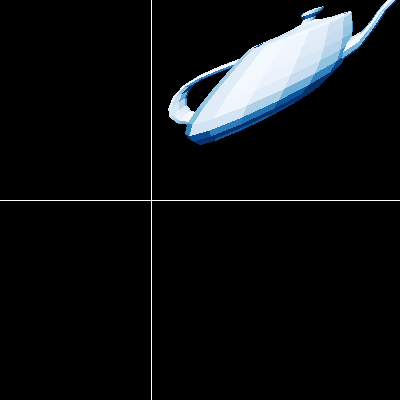

In [10]:
transform = ((2,1,1),(1,2,1),(1,1,2))
teapot_model_transformed = map_to_polygons(lambda v: multiply_matrix_vector(transform, v),teapot_model)

image = d3.render_frame(teapot_model_transformed, light, display_properties)
display_inline(image)

In [11]:
m = random_matrix(3, 3)
v = random_matrix(1, 3)[0]

assert vector_epsilon_equal(multiply_matrix_vector(m, v), multiply_matrix_vector2(m, v))
assert vector_epsilon_equal(multiply_matrix_vector(m, v), multiply_matrix_vector3(m, v))


In [12]:
def compose_a_b(v):
    a = ((1, 1, 0), (1, 0, 1), (1, -1, 1))
    b = ((0, 2, 1), (0, 1, 0), (1, 0, -1))

    return multiply_matrix_vector(b, multiply_matrix_vector(a, v))

a = ((1, 1, 0), (1, 0, 1), (1, -1, 1))
b = ((0, 2, 1), (0, 1, 0), (1, 0, -1))
comp_a_b = infer_matrix(3, compose_a_b)

assert matrix_epsilon_equal(comp_a_b, matrix_multiply(b, a))

In [13]:
a = ((1, 1, 0), (1, 0, 1), (1, -1, 1))

pa = matrix_power(3, a)
mma = matrix_multiply(matrix_multiply(a, a), a)

print(a)
print(pa)
print(mma)
assert matrix_epsilon_equal(pa, mma)

((1, 1, 0), (1, 0, 1), (1, -1, 1))
((4, 1, 2), (3, 1, 1), (1, 1, 0))
((4, 1, 2), (3, 1, 1), (1, 1, 0))
